In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
import seaborn as sns
import time
# in house functions: 
%run 'DST_fun.ipynb' # model_report() and review_vector() 

train_df = pd.read_csv("../data/avis/train_noYC_lemma_sent_equil.csv", index_col=0)
feature_cols = ['n_avis','sentiment_norm','longueur_texte']+ [colname for colname in train_df.columns if "bank_" in colname] 

y_train = train_df.etoiles
X_train = train_df.drop("etoiles", axis = 1)
X_train = train_df[feature_cols]

test_df = pd.read_csv('../data/avis/test_noYC_lemma_sent_equil.csv', index_col=0)
y_test = test_df['etoiles']
X_test = test_df.drop("etoiles", axis =1)
X_test = test_df[feature_cols]

model_name = "LG"

#train.head()
X_train.head(2)

,n_avis,sentiment_norm,longueur_texte,bank__01BanqueenLigne,bank__Anytime,bank__BforBank,bank__Blank,bank__BoursoBank,bank__BoursoramaBanque,bank__Btocadvice,...,bank__ZELF,bank__bcfinance.fr,bank__floapay.com,bank__franfinance.fr,bank__ips,bank__laNef,bank__manager.one,bank__moneywalkie.com,bank__propulsebyca.fr,bank__qui-est-la-banque-la-moins-chere.com
5529,-0.426925,0.804014,-0.444335,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57109,-0.426925,0.974431,-0.512719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 0 Modelisation de base n_avis, length

# 1. modelisation n avis, sentiment, longeur txt

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train score:  0.49
              precision    recall  f1-score   support

           1       0.60      0.64      0.62       562
           2       0.42      0.42      0.42       562
           3       0.40      0.38      0.39       562
           4       0.44      0.34      0.38       562
           5       0.58      0.69      0.63       562

    accuracy                           0.49      2810
   macro avg       0.49      0.49      0.49      2810
weighted avg       0.49      0.49      0.49      2810



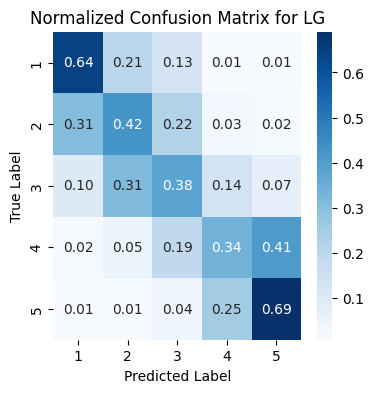

creating new csv for LG


In [19]:
test_name =f"{model_name}- n_avis, sentiment, text length, companies"
model = LogisticRegression(random_state = 7)
t0 = time.time()
model.fit(X_train, y_train)
model_report(test_name, model_name)

# 2. Grid SVM n_avis, sentiment, txt length

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.421 total time=   0.6s
[CV 4/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.410 total time=   0.6s
[CV 1/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.400 total time=   0.5s
[CV 5/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.428 total time=   0.6s
[CV 2/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.395 total time=   0.5s
[CV 2/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.411 total time=   0.6s
[CV 3/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.404 total time=   0.5s
[CV 4/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.388 total time=   0.5s
[CV 3/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.436 total time=   0.6s
[CV 1/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.398 total time=   0.5s
[CV 5/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.406 total time=   0.5s
[CV 2/5] END C=0.001, l1_ratio=0.7, solver=saga

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.491 total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

[CV 2/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.492 total time=   4.8s
[CV 1/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.489 total time=   4.6s
[CV 3/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.498 total time=   4.8s
[CV 2/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.497 total time=   4.7s
[CV 4/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.490 total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.493 total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

[CV 3/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.496 total time=   4.7s
[CV 5/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.491 total time=   4.7s
[CV 4/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.483 total time=   4.8s
[CV 1/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.487 total time=   4.7s
[CV 2/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.490 total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.495 total time=   4.7s
[CV 4/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.485 total time=   4.7s
[CV 1/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.486 total time=   4.7s
[CV 5/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.489 total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.489 total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.490 total time=   4.8s
[CV 4/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.486 total time=   4.8s
[CV 5/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.488 total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.489 total time=   5.3s
[CV 2/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.498 total time=   5.3s
[CV 3/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.499 total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

[CV 1/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.490 total time=   5.1s
[CV 2/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.497 total time=   5.1s
[CV 3/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.500 total time=   5.1s
[CV 4/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.488 total time=   5.4s
[CV 5/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.498 total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.489 total time=   5.1s
[CV 4/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.486 total time=   5.2s
[CV 2/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.497 total time=   5.1s
[CV 5/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.499 total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.500 total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.484 total time=   5.3s
[CV 1/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.491 total time=   5.2s
[CV 5/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.499 total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.496 total time=   5.2s
[CV 3/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.500 total time=   5.2s
[CV 4/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.484 total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.498 total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.490 total time=   5.7s
[CV 3/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.499 total time=   5.7s
[CV 2/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.498 total time=   5.8s
[CV 4/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.489 total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.500 total time=   5.7s
[CV 1/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.490 total time=   5.7s
[CV 2/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.498 total time=   5.7s
[CV 3/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.499 total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.489 total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.500 total time=   5.5s
[CV 1/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.490 total time=   5.5s
[CV 2/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.499 total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.499 total time=   5.6s
[CV 4/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.489 total time=   5.6s
[CV 5/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.500 total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.490 total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.498 total time=   5.5s
[CV 3/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.499 total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.489 total time=   5.6s
[CV 5/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.500 total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.490 total time=   5.6s
[CV 2/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.498 total time=   5.7s
[CV 3/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.499 total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.489 total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.501 total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.490 total time=   6.2s
[CV 2/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.498 total time=   6.2s
[CV 3/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.499 total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.501 total time=   6.2s
[CV 4/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.489 total time=   6.2s
[CV 1/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.490 total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.498 total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.499 total time=   6.2s
[CV 4/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.489 total time=   6.1s
[CV 5/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.501 total time=   6.1s
[CV 1/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.490 total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.498 total time=   6.2s
[CV 3/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.499 total time=   6.1s
[CV 4/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.489 total time=   6.1s
[CV 5/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.501 total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.490 total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.498 total time=   5.9s
[CV 3/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.499 total time=   5.9s
[CV 4/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.489 total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.490 total time=   5.9s
[CV 5/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.501 total time=   5.9s
[CV 2/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.498 total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.499 total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.489 total time=   5.9s
[CV 5/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.501 total time=   5.8s
[CV 1/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.490 total time=   5.8s
[CV 2/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.498 total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.499 total time=   5.7s
[CV 5/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.501 total time=   5.7s
[CV 4/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.489 total time=   5.7s
[CV 1/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.490 total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.498 total time=   3.9s
[CV 3/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.499 total time=   3.7s
[CV 4/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.489 total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.501 total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


best parameters {'C': 100, 'l1_ratio': 0.1, 'solver': 'saga'}
train score:  0.49
              precision    recall  f1-score   support

           1       0.60      0.64      0.62       562
           2       0.42      0.42      0.42       562
           3       0.40      0.38      0.39       562
           4       0.43      0.33      0.38       562
           5       0.57      0.69      0.63       562

    accuracy                           0.49      2810
   macro avg       0.49      0.49      0.49      2810
weighted avg       0.49      0.49      0.49      2810



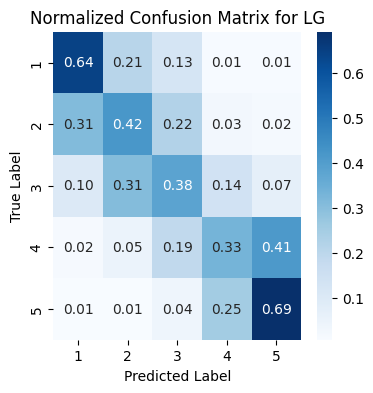

In [20]:
test_name =f"{model_name}- GRID n_avis, sentiment, text length, companies"
# definir des hyper paramètres à tester
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['saga'], 
    'l1_ratio': [0.1, 0.5, 0.7, 1]  
}

# tester les différents paramètres
t0= time.time()
model = GridSearchCV(LogisticRegression(penalty = 'elasticnet',random_state = 7),param_grid, n_jobs = -1,  refit = True, verbose = 3)
model.fit(X_train, y_train)
print("best parameters", model.best_params_)
model_report(test_name, model_name)

# 3. Grid SVM: text TFIDF, n_avis, sent, length

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train score:  0.49
              precision    recall  f1-score   support

           1       0.60      0.64      0.62       562
           2       0.42      0.42      0.42       562
           3       0.40      0.38      0.39       562
           4       0.44      0.34      0.38       562
           5       0.58      0.69      0.63       562

    accuracy                           0.49      2810
   macro avg       0.49      0.49      0.49      2810
weighted avg       0.49      0.49      0.49      2810



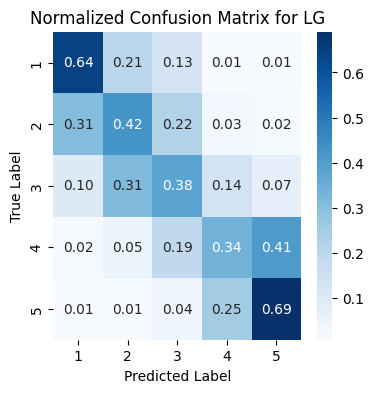

In [21]:
test_name =f"{model_name}- n_avis, sentiment, text length, companies"
model = LogisticRegression(random_state = 7)
t0 = time.time()
model.fit(X_train, y_train)
model_report(test_name, model_name)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 2/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.398 total time=   0.4s
[CV 4/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.397 total time=   0.4s
[CV 1/5] END ..C=0.001, l1_ratio=1, solver=saga;, score=0.404 total time=   0.4s
[CV 5/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.402 total time=   0.4s
[CV 1/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.399 total time=   0.4s
[CV 3/5] END C=0.001, l1_ratio=0.7, solver=saga;, score=0.399 total time=   0.4s
[CV 4/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.392 total time=   0.5s
[CV 3/5] END C=0.001, l1_ratio=0.1, solver=saga;, score=0.428 total time=   0.7s
[CV 3/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.401 total time=   0.7s
[CV 2/5] END ..C=0.001, l1_ratio=1, solver=saga;, score=0.390 total time=   0.3s
[CV 1/5] END C=0.001, l1_ratio=0.5, solver=saga;, score=0.399 total time=   0.7s
[CV 1/5] END C=0.001, l1_ratio=0.1, solver=saga

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

[CV 2/5] END .C=0.01, l1_ratio=0.5, solver=saga;, score=0.446 total time=   3.0s
[CV 1/5] END .C=0.01, l1_ratio=0.5, solver=saga;, score=0.442 total time=   3.0s
[CV 2/5] END .C=0.01, l1_ratio=0.7, solver=saga;, score=0.432 total time=   2.9s
[CV 3/5] END .C=0.01, l1_ratio=0.7, solver=saga;, score=0.445 total time=   3.0s
[CV 3/5] END .C=0.01, l1_ratio=0.5, solver=saga;, score=0.462 total time=   3.1s
[CV 1/5] END .C=0.01, l1_ratio=0.7, solver=saga;, score=0.432 total time=   3.0s
[CV 4/5] END .C=0.01, l1_ratio=0.7, solver=saga;, score=0.421 total time=   3.0s
[CV 4/5] END .C=0.01, l1_ratio=0.5, solver=saga;, score=0.448 total time=   3.1s
[CV 5/5] END .C=0.01, l1_ratio=0.5, solver=saga;, score=0.456 total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .C=0.01, l1_ratio=0.7, solver=saga;, score=0.438 total time=   3.0s
[CV 1/5] END ...C=0.01, l1_ratio=1, solver=saga;, score=0.430 total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=0.01, l1_ratio=0.1, solver=saga;, score=0.466 total time=   4.0s
[CV 2/5] END .C=0.01, l1_ratio=0.1, solver=saga;, score=0.480 total time=   4.1s
[CV 3/5] END .C=0.01, l1_ratio=0.1, solver=saga;, score=0.482 total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .C=0.01, l1_ratio=0.1, solver=saga;, score=0.469 total time=   4.1s
[CV 5/5] END .C=0.01, l1_ratio=0.1, solver=saga;, score=0.477 total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=0.01, l1_ratio=1, solver=saga;, score=0.435 total time=   2.7s
[CV 3/5] END ...C=0.01, l1_ratio=1, solver=saga;, score=0.437 total time=   2.7s
[CV 4/5] END ...C=0.01, l1_ratio=1, solver=saga;, score=0.423 total time=   2.7s
[CV 5/5] END ...C=0.01, l1_ratio=1, solver=saga;, score=0.437 total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.495 total time=   4.1s
[CV 2/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.513 total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.508 total time=   5.4s
[CV 2/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.521 total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.520 total time=   5.5s
[CV 4/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.495 total time=   5.5s
[CV 1/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.478 total time=   3.6s
[CV 5/5] END ..C=0.1, l1_ratio=0.5, solver=saga;, score=0.517 total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.485 total time=   4.2s
[CV 3/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.512 total time=   4.3s
[CV 5/5] END ..C=0.1, l1_ratio=0.7, solver=saga;, score=0.511 total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.496 total time=   3.4s
[CV 3/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.499 total time=   3.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.482 total time=   3.3s
[CV 5/5] END ....C=0.1, l1_ratio=1, solver=saga;, score=0.507 total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.534 total time=  22.2s
[CV 2/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.568 total time=  22.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.547 total time=  22.5s
[CV 3/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.545 total time=  22.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=0.1, l1_ratio=0.1, solver=saga;, score=0.547 total time=  22.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.577 total time=  26.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.593 total time=  32.3s
[CV 1/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.574 total time=  32.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.558 total time=  32.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.571 total time=  32.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, l1_ratio=0.5, solver=saga;, score=0.565 total time=  33.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.575 total time=  21.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.596 total time=  27.1s
[CV 4/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.556 total time=  27.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.567 total time=  27.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, l1_ratio=0.7, solver=saga;, score=0.562 total time=  27.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.574 total time=  46.6s
[CV 4/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.558 total time=  46.5s
[CV 3/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.569 total time=  46.6s
[CV 2/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.597 total time=  46.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=1, l1_ratio=0.1, solver=saga;, score=0.576 total time=  46.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.596 total time=  20.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.549 total time=  20.6s
[CV 3/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.563 total time=  20.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ......C=1, l1_ratio=1, solver=saga;, score=0.562 total time=  20.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.575 total time=  46.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.602 total time=  45.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.566 total time=  46.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.575 total time=  44.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.601 total time=  43.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.560 total time=  45.6s
[CV 5/5] END ...C=10, l1_ratio=0.1, solver=saga;, score=0.581 total time=  45.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.575 total time=  42.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.602 total time=  42.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.580 total time=  43.5s
[CV 3/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.566 total time=  43.6s
[CV 4/5] END ...C=10, l1_ratio=0.5, solver=saga;, score=0.561 total time=  43.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.566 total time=  41.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.560 total time=  41.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ...C=10, l1_ratio=0.7, solver=saga;, score=0.580 total time=  41.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.576 total time=  40.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.601 total time=  42.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.566 total time=  42.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.559 total time=  42.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .....C=10, l1_ratio=1, solver=saga;, score=0.581 total time=  42.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.577 total time=  47.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.602 total time=  47.5s
[CV 3/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.567 total time=  47.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.562 total time=  47.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, l1_ratio=0.1, solver=saga;, score=0.583 total time=  47.6s
[CV 1/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.576 total time=  47.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.602 total time=  47.6s
[CV 3/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.567 total time=  47.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.561 total time=  47.9s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, l1_ratio=0.5, solver=saga;, score=0.583 total time=  48.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.576 total time=  48.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.602 total time=  48.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.567 total time=  49.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.561 total time=  49.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ..C=100, l1_ratio=0.7, solver=saga;, score=0.583 total time=  49.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.576 total time=  49.2s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.602 total time=  49.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.566 total time=  49.5s
[CV 4/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.561 total time=  49.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END ....C=100, l1_ratio=1, solver=saga;, score=0.583 total time=  49.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.577 total time=  50.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.602 total time=  50.1s
[CV 3/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.567 total time=  50.1s
[CV 4/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.562 total time=  50.1s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .C=1000, l1_ratio=0.1, solver=saga;, score=0.584 total time=  50.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.577 total time=  49.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.602 total time=  49.7s
[CV 3/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.567 total time=  49.6s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.562 total time=  43.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END .C=1000, l1_ratio=0.5, solver=saga;, score=0.584 total time=  43.3s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.577 total time=  42.7s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.602 total time=  41.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.567 total time=  39.4s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.562 total time=  38.9s
[CV 5/5] END .C=1000, l1_ratio=0.7, solver=saga;, score=0.584 total time=  38.8s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.577 total time=  38.5s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.602 total time=  38.2s
[CV 3/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.567 total time=  38.0s
[CV 4/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.562 total time=  38.1s
[CV 5/5] END ...C=1000, l1_ratio=1, solver=saga;, score=0.584 total time=  38.0s


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


train score:  0.45
              precision    recall  f1-score   support

           1       0.55      0.54      0.54       562
           2       0.37      0.39      0.38       562
           3       0.36      0.35      0.35       562
           4       0.42      0.36      0.39       562
           5       0.53      0.61      0.57       562

    accuracy                           0.45      2810
   macro avg       0.45      0.45      0.45      2810
weighted avg       0.45      0.45      0.45      2810



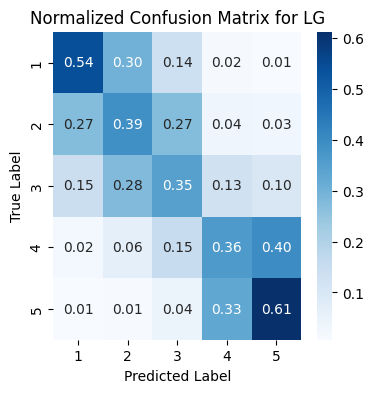

In [22]:
test_name =f"{model_name}- GRID text TFIDF, n_avis, sentiment, text length, companies"
# Vectorization des avis lémmatisés
X_train = review_vector(train_df, feature_cols)
X_test = review_vector(test_df, feature_cols)

# tester les différents paramètres
t0= time.time()
model = GridSearchCV(LogisticRegression(penalty = 'elasticnet', random_state = 7),param_grid, n_jobs =-1,  refit = True, verbose = 3)
model.fit(X_train, y_train)
# reporting
model_report(test_name, model_name)

# Recap

In [23]:
bench = pd.read_csv(f'../reports/benchmark/{model_name}_model_benchmark.csv', index_col=0).drop_duplicates(subset=['model'], keep= "last")
bench

,model,grid search,used/best params,score,precision,recall,f1,time_taken_mns,run_date
0,"LG- n_avis, sentiment, text length, companies",no,baseline hyperparameters,0.49,0.49,0.49,0.49,0.01,2024-02-08
0,"LG- GRID n_avis, sentiment, text length, compa...",yes,"{'C': 100, 'l1_ratio': 0.1, 'solver': 'saga'}",0.49,0.49,0.49,0.49,0.62,2024-02-08
0,"LG - GRID n_avis, sentiment, text length, comp...",no,baseline hyperparameters,0.49,0.49,0.49,0.49,0.00,2024-02-08
0,"LG- GRID text TFIDF, n_avis, sentiment, text l...",yes,"{'C': 1000, 'l1_ratio': 0.1, 'solver': 'saga'}",0.45,0.45,0.45,0.45,4.17,2024-02-08
